[![Py4Life](https://raw.githubusercontent.com/Py4Life/TAU2015/gh-pages/img/Py4Life-logo-small.png)](http://py4life.github.io/TAU2015/)
# Using web APIs with Python - 9.6.2015
### Last update: 9.6.2015
### Tel-Aviv University / 0411-3122 / Spring 2015

In [1]:
%matplotlib inline
from IPython.display import HTML
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('white')
sns.set_context('talk', font_scale=1.2)

## The Very Hungry Caterpillar example

In [2]:
HTML('<blockquote class="twitter-tweet" lang="he"><p lang="en" dir="ltr">Hmm, I don&#39;t know about this caterpillar rearing manual. I thought P.rapae had an obligate association w/ Brassica. <a href="http://t.co/M10dqbOYlN">pic.twitter.com/M10dqbOYlN</a></p>&mdash; Christie Bahlai (@cbahlai) <a href="https://twitter.com/cbahlai/status/597462491166150656">מאי 10, 2015</a></blockquote><script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>')

In [3]:
HTML('<blockquote class="twitter-tweet" lang="he"><p lang="en" dir="ltr">This is a terrible dataset about caterpillar diet. How did it got published? <a href="http://t.co/XkAq51HxEP">pic.twitter.com/XkAq51HxEP</a></p>&mdash; Timothée Poisot (@tpoi) <a href="https://twitter.com/tpoi/status/591041490618552320">אפריל 23, 2015</a></blockquote><script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>')

In [4]:
HTML('<blockquote class="twitter-tweet" data-partner="tweetdeck"><p lang="und" dir="ltr"><a href="https://twitter.com/tpoi">@tpoi</a> <a href="https://twitter.com/kara_woo">@kara_woo</a> <a href="https://twitter.com/cbahlai">@cbahlai</a> <a href="http://t.co/5lj9EzuKjW">pic.twitter.com/5lj9EzuKjW</a></p>&mdash; Yoav Ram (@yoavram) <a href="https://twitter.com/yoavram/status/597518650082365440">May 10, 2015</a></blockquote><script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>')

In [5]:
HTML('<blockquote class="twitter-tweet" data-partner="tweetdeck"><p lang="en" dir="ltr">[blog] How hungry are caterpillars anyway? <a href="http://t.co/SvImkHYHhR">http://t.co/SvImkHYHhR</a> <a href="https://twitter.com/hashtag/opendata?src=hash">#opendata</a></p>&mdash; Timothée Poisot (@tpoi) <a href="https://twitter.com/tpoi/status/597518409203589122">May 10, 2015</a></blockquote><script async src="//platform.twitter.com/widgets.js" charset="utf-8"></script>')

We will learn how to use the Global Biotic Interactions (globi) **web API** with Python to check **[How hungry are caterpillars anyway?](http://timotheepoisot.fr/2015/05/10/hungry-caterpillars/)** (sort of).

## Web API
First, what is a web API?

Modern web APIs use are RESTful Application Programming Interface that return responses in JSON format (or sometimes XML) over HTTP (or securely over HTTPS - guess what the S stands for).

- HTTP: a protocol for transfering text files on the internet
- JSON: a file format, very similar to Python's `dict`.
- REST: a common convention for designing web applications that allow querying and retrieving (and sometimes creating, changing and deleting) data.

A web API is a language that allows computers to talk to computers (so my computer, running Python, to talk to a computer abroad used as the server for globi). 

The nouns of the languages are URLs. These are Universal Resource Locations (also sometimes URI, with Identifier) and are used to identify resources on the World Wide Web. For example, our course website URL is at <http://py4life.github.io/TAU2015>. This URL has structure (protocol - HTTP; domain - github.io, used by github to host user websites; subdomain - py4life, used to denote the github user Py4Life; and TAU2015 - the resource requested.

The verbs of this language are GET, POST, PATCH and DELETE (there are a bunch of others but these are the major ones) that allow us to retrieve a resource and change it (add a new resource with POST, modify and existing one with PATCH, and delete it with DELETE). These are the basic things we can do on the web to things that are represented by URLs.

So I can read lecture 1 by doing a GET on <http://nbviewer.ipython.org/github/Py4Life/TAU2015/blob/master/lecture1.ipynb>. 
I can create send form on the web by doing a POST. 
But machines like to talk to one another using all the verbs, asking each other for resources, adding new resources, changing and deleting existing ones.

See this nice post by Ryan Tomayko on [explaining REST](http://www.looah.com/source/view/2284).

## Using the API

Let's try it, following [Poisot's lead on _The Very Hungry Caterpillar_](http://timotheepoisot.fr/2015/05/10/hungry-caterpillars/).

We will use [_requests_](http://docs.python-requests.org/en/latest/) - a Python HTTP library _for humans_ - to connect to the globi [API](http://www.globalbioticinteractions.org/). _requests_ is much better and nicer than `urllib` is, and it should be installed, but if not just use `conda install requests` or `pip install requests`.

For our purpose we only need to GET information from the API, and we want to get infromation regarding interactions, so the base URL is <http://api.globalbioticinteractions.org/interaction> - the protocol is HTTP (this is the language we use), the `globalbioticinteractions.org` is the organization we are talking with, through their `api` subdomain, and we are interested in `interaction` resources.

Which interactions? This is specified using parameters - you put a `?` before the parameters, separate them with `&`, and spcify them by `key=value`. This is similar to how we call a function in Python using `(...)`, `, `, and `=` for the same purposes.

We want interactions where the source taxon is Pireis and the type of interaction is eats - what does Pieris eats! 

The URL is: `http://api.globalbioticinteractions.org/interaction?sourceTaxon=Pieris&interactionType=eats`. 

How do I know the name of the domain, the interaction endpoint and the parameter names? From the [API docs](https://github.com/jhpoelen/eol-globi-data/wiki/API).

In [6]:
response = requests.get("http://api.globalbioticinteractions.org/interaction?sourceTaxon=Pieris&interactionType=eats")
print("OK:", response.ok)

OK: True


The respose payload is in JSON format. `JSON` is very similar to `dict`:

In [21]:
print(response.text[:500])

{
  "columns" : [ "source_taxon_external_id", "source_taxon_name", "source_taxon_path", "source_specimen_life_stage", "source_specimen_basis_of_record", "interaction_type", "target_taxon_external_id", "target_taxon_name", "target_taxon_path", "target_specimen_life_stage", "target_specimen_basis_of_record", "latitude", "longitude", "study_title" ],
  "data" : [ [ "EOL:174006", "Pieris marginalis", "Animalia | Bilateria | Protostomia | Ecdysozoa | Arthropoda | Hexapoda | Insecta | Pterygota | Neop


Calling the `json` method will return the payload as a `dict`:

In [22]:
payload = response.json()
print(type(payload))

<class 'dict'>


Now we need to work out the details of how the data is kept inside this `dict`. We can look it up in the API, but we might be able to do it on our own by just looking at the keys and values. This is why `json` is a nice format - it is just as easily read by humans as it is rad by machines, becoming the developer's work easier.

In [27]:
print(len(payload))
print(payload.keys())
print(payload['data'][:3])

2
dict_keys(['data', 'columns'])
[['EOL:174006', 'Pieris marginalis', 'Animalia | Bilateria | Protostomia | Ecdysozoa | Arthropoda | Hexapoda | Insecta | Pterygota | Neoptera | Holometabola | Lepidoptera | Papilionoidea | Pieridae | Pierinae | Pierini | Pierina | Pieris | Pieris marginalis', None, None, 'eats', 'EOL:29914', 'Rubus', 'Plantae | Tracheophyta | Magnoliopsida | Rosales | Rosaceae | Rubus | Rubus status', None, None, None, None, None], ['EOL:174006', 'Pieris marginalis', 'Animalia | Bilateria | Protostomia | Ecdysozoa | Arthropoda | Hexapoda | Insecta | Pterygota | Neoptera | Holometabola | Lepidoptera | Papilionoidea | Pieridae | Pierinae | Pierini | Pierina | Pieris | Pieris marginalis', None, None, 'eats', 'EOL:37457', 'Arabis', 'Plantae | Tracheophyta | Magnoliopsida | Brassicales | Brassicaceae | Arabis', None, None, None, None, None], ['EOL:174006', 'Pieris marginalis', 'Animalia | Bilateria | Protostomia | Ecdysozoa | Arthropoda | Hexapoda | Insecta | Pterygota | Neo

The response has two fields, `columns` and `data`, corresponding to the data frame's column names and rows. That's great because we can push it right into a `pandas.DataFrame`:

In [28]:
print(payload['columns'])

['source_taxon_external_id', 'source_taxon_name', 'source_taxon_path', 'source_specimen_life_stage', 'source_specimen_basis_of_record', 'interaction_type', 'target_taxon_external_id', 'target_taxon_name', 'target_taxon_path', 'target_specimen_life_stage', 'target_specimen_basis_of_record', 'latitude', 'longitude', 'study_title']


In [9]:
print(payload['data'][0])

['EOL:174006', 'Pieris marginalis', 'Animalia | Bilateria | Protostomia | Ecdysozoa | Arthropoda | Hexapoda | Insecta | Pterygota | Neoptera | Holometabola | Lepidoptera | Papilionoidea | Pieridae | Pierinae | Pierini | Pierina | Pieris | Pieris marginalis', None, None, 'eats', 'EOL:29914', 'Rubus', 'Plantae | Tracheophyta | Magnoliopsida | Rosales | Rosaceae | Rubus | Rubus status', None, None, None, None, None]


We are lucky, sometimes it takes much more work to process the response into the data frame we like so much.

In [12]:
df = pd.DataFrame(payload['data'], columns=payload['columns'])
print(df.shape)
df.head()

(232, 14)


source_taxon_external_id  source_taxon_name  \
0               EOL:174006  Pieris marginalis   
1               EOL:174006  Pieris marginalis   
2               EOL:174006  Pieris marginalis   
3               EOL:174006  Pieris marginalis   
4               EOL:176683       Pieris rapae   

                                   source_taxon_path  \
0  Animalia | Bilateria | Protostomia | Ecdysozoa...   
1  Animalia | Bilateria | Protostomia | Ecdysozoa...   
2  Animalia | Bilateria | Protostomia | Ecdysozoa...   
3  Animalia | Bilateria | Protostomia | Ecdysozoa...   
4  Animalia | Arthropoda | Insecta | Lepidoptera ...   

  source_specimen_life_stage source_specimen_basis_of_record interaction_type  \
0                       None                            None             eats   
1                       None                            None             eats   
2                       None                            None             eats   
3                       None                            None             eats   
4                       None                            None             eats   

  target_taxon_external_id     target_taxon_name  \
0                EOL:29914                 Rubus   
1                EOL:37457                Arabis   
2                EOL:37718               Rorippa   
3                EOL:37667             Cardamine   
4               EOL:467679  Centaurea melitensis   

                                   target_taxon_path  \
0  Plantae | Tracheophyta | Magnoliopsida | Rosal...   
1  Plantae | Tracheophyta | Magnoliopsida | Brass...   
2  Plantae | Tracheophyta | Magnoliopsida | Brass...   
3  Plantae | Tracheophyta | Magnoliopsida | Brass...   
4  Plantae | Tracheophyta | Magnoliopsida | Aster...   

  target_specimen_life_stage target_specimen_basis_of_record latitude  \
0                       None                            None     None   
1                       None                            None     None   
2                       None                            None     None   
3                       None                            None     None   
4                       None                            None     None   

  longitude study_title  
0      None        None  
1      None        None  
2      None        None  
3      None        None  
4      None        None

## Using the data

Let's see what each caterpillar eats. We got the `eats` interactions, so let's just leave the source and target taxons:

In [13]:
cols = df.columns.tolist()
cols.remove('source_taxon_name')
cols.remove('target_taxon_name')
print(cols)

['source_taxon_external_id', 'source_taxon_path', 'source_specimen_life_stage', 'source_specimen_basis_of_record', 'interaction_type', 'target_taxon_external_id', 'target_taxon_path', 'target_specimen_life_stage', 'target_specimen_basis_of_record', 'latitude', 'longitude', 'study_title']


In [14]:
df.drop(labels=cols, axis=1, inplace=True)
df.head()

source_taxon_name     target_taxon_name
0  Pieris marginalis                 Rubus
1  Pieris marginalis                Arabis
2  Pieris marginalis               Rorippa
3  Pieris marginalis             Cardamine
4       Pieris rapae  Centaurea melitensis

Next, we count how many target taxons occur for each source taxon. For that, we group by source and aggregate by length (I made sure before that each source-target pair appears only once. How??). 

The `groupby` made `source_taxon_name` become an index rather than a column and that's why we call `reset_index`.

In [15]:
table = df.groupby(by='source_taxon_name').aggregate(len).reset_index()
table.head()

source_taxon_name  target_taxon_name
0     Pieris brassicae                 55
1  Pieris brassicoides                  3
2       Pieris canidia                 10
3    Pieris cheiranthi                  1
4         Pieris deota                  1

Finally we rename the columns to make them more meaningful and we sort the table by the number of target taxons. Then we print and plot:

In [16]:
table = table.rename(columns={'source_taxon_name':'Pieris species', 'target_taxon_name': 'Number of known items in diet'})
table = table.sort('Number of known items in diet', ascending=False)
table

Pieris species  Number of known items in diet
12         Pieris rapae                             91
0      Pieris brassicae                             55
11          Pieris napi                             51
2        Pieris canidia                             10
13  Pieris virginiensis                              6
8     Pieris marginalis                              4
1   Pieris brassicoides                              3
6       Pieris krueperi                              3
5         Pieris ergane                              2
7         Pieris mannii                              2
10       Pieris naganum                              2
3     Pieris cheiranthi                              1
4          Pieris deota                              1
9         Pieris melete                              1

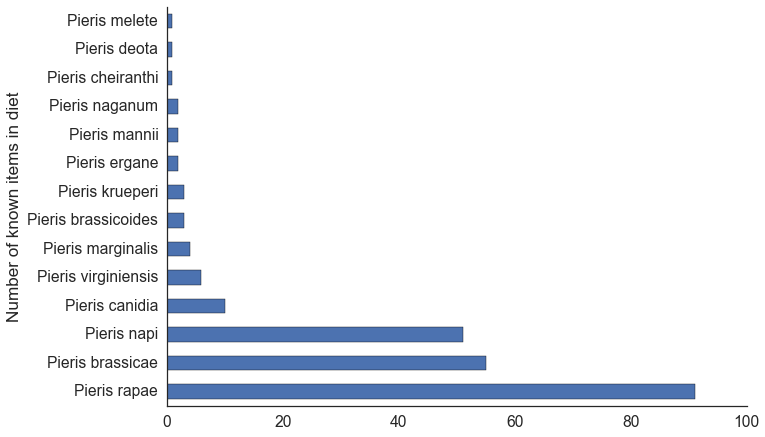

In [17]:
table.plot(x="Pieris species", y="Number of known items in diet", kind="barh", legend=False)
plt.ylabel('Number of known items in diet')
plt.grid(False)
sns.despine()

A very hungry caterpillar
![caterpillar](http://1.bp.blogspot.com/-gZhDuc_eD_U/U8To75wL9UI/AAAAAAAAOD4/Q7LDDM7B3H4/s1600/the-very-hungry-caterpillar-2.jpg)

Pieris rapae
![Pieris rapae](http://upload.wikimedia.org/wikipedia/commons/b/b4/Pieris.rapae.caterpillar.jpg)

Pieris brassicae
![Pieris brassicae](http://upload.wikimedia.org/wikipedia/commons/5/52/Pieris.brassicae.caterpillar.jpg)

## Fin
This notebook is part of the _Python Programming for Life Sciences Graduate Students_ course given in Tel-Aviv University, Spring 2015.

The notebook was written using [Python](http://pytho.org/) 3.4.1 and [IPython](http://ipython.org/) 3.1.0 (download from [PyZo](http://www.pyzo.org/downloads.html)).

The code is available at https://github.com/Py4Life/TAU2015/blob/master/globi_caterpillars.ipynb.

The notebook can be viewed online at http://nbviewer.ipython.org/github/Py4Life/TAU2015/blob/master/globi_caterpillars.ipynb.

This work is licensed under a Creative Commons Attribution-ShareAlike 3.0 Unported License.

![Python logo](https://www.python.org/static/community_logos/python-logo.png)